In [1]:
%matplotlib widget

Filename: /home/bengreen/University/Part III/stellar-heterogeneity-modelling/spots_and_faculae_model/assets/MAST_2025-10-26T08_10_09.071Z - K2-18/MAST_2025-10-26T08_10_09.071Z/JWST/jw02722003001_04101_00001-seg001_nis_x1dints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     367   ()      
  1  SCI           1 ImageHDU        32   ()      
  2  INT_TIMES     1 BinTableHDU     24   190R x 7C   [J, D, D, D, D, D, D]   
  3  EXTRACT1D     1 BinTableHDU    102   190R x 27C   ['J', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', '2048J', '2048D', '2048D', '2048D', '2048D', '2048D', '2048D', 'J', 'J', 'D', 'D', 'D', 'D', 'D', 'D']   
  4  EXTRACT1D     2 BinTableHDU    102   190R x 27C   [J, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, 1783J, 1783D, 1783D, 1783D, 1783D, 1783D, 1783D, J, J, D, D, D, D, D, D]   
  5  ASDF          1 BinTableHDU     11   1R x 1

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               286780 / length of dimension 1                          
NAXIS2  =                  190 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   27 / number of table fields                         
EXTNAME = 'EXTRACT1D'          / extension name                                 
EXTVER  =                    1 / extension value                                
TTYPE1  = 'INT_NUM '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'WAVELENGTH'      

/tmp/ipykernel_35562/1148228937.py:31: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(spec.Wavelengths, spec.Fluxes)


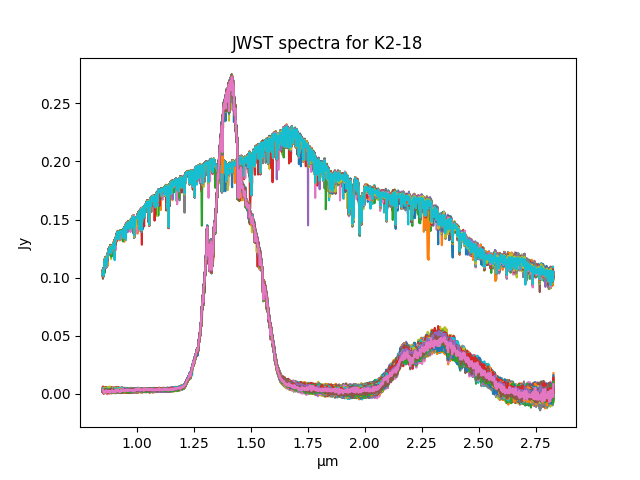

In [ ]:
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os
from itertools import product
from tqdm import tqdm
from astropy.visualization import quantity_support
quantity_support() # required for numpy to not get annoyed when doing e.g. np.stack()
import matplotlib.pyplot as plt

from src.spectrum_component_analyser.internals.readers import read_JWST_fits, read_JWST_fits_all_spectra
from spectrum_component_analyser.internals.spectrum import spectrum

# read in spectrum to fit
external_spectrum_path = Path("../../assets/MAST_2025-10-26T08_10_09.071Z - K2-18/MAST_2025-10-26T08_10_09.071Z/JWST/jw02722003001_04101_00001-seg001_nis_x1dints.fits")
script_dir = os.getcwd()
wavelength_grid_absolute_path = (script_dir / external_spectrum_path).resolve()
_ = read_JWST_fits(wavelength_grid_absolute_path, name = "K2-18", verbose=True)

external_spectrum_path = Path("../../assets/MAST_2025-10-26T19_14_56.832Z - L98-59/MAST_2025-10-26T19_14_56.832Z/JWST/jw04098001001_04101_00001-seg001_nis_x1dints.fits")
script_dir = os.getcwd()
wavelength_grid_absolute_path = (script_dir / external_spectrum_path).resolve()
_ = read_JWST_fits(wavelength_grid_absolute_path, name = "K2-18", verbose=True)

spectra_to_decompose : list[spectrum] = read_JWST_fits_all_spectra(wavelength_grid_absolute_path, name = "K2-18")

for spec in spectra_to_decompose:
    plt.plot(spec.Wavelengths, spec.Fluxes)
plt.title("JWST spectra for K2-18")
plt.show()
# print(spectrum_to_decompose.Name)
# mask = np.isfinite(spectrum_to_decompose.Fluxes) # mask that removes np.inf values from spectra - this could be observational spectra dependent; so we have to apply this to the data cube after creating the data cube, not before
# spectrum_to_decompose = spectrum_to_decompose[mask]

# spectrum_to_decompose.plot()